In [14]:
# %%

import pandas as pd

df2 = pd.read_excel("C:/Users/Giuseppe/Desktop/Stage_exprivia/Python/Analisi_coste/Difesa_costiera.xls")

df2.columns = df2.iloc[0]
df2 = df2.drop(0, axis=0)
df2.columns = df2.columns.str.strip()
df2['Regioni'] = df2['Regioni'].ffill()

# Creazione del pivot
df_pivot = df2.pivot(index='Regioni', columns='Anno', 
                     values=['Isolotti', 'Opere Miste', 'Pennelli', 'Radenti', 'Scogliere', 'Totali'])

df_pivot.columns = [f"{col[0]}_{col[1]}" for col in df_pivot.columns]
df_pivot = df_pivot.reset_index()
df_pivot_cleaned = df_pivot.loc[:, ~df_pivot.columns.str.contains('nan')]
df2 = df_pivot_cleaned

italia_row = df2[df2['Regioni'].str.contains('Totale', case=False, na=False)]
other_rows = df2[~df2['Regioni'].str.contains('Totale', case=False, na=False)]


other_rows = other_rows.sort_values(['Regioni'])


df2 = pd.concat([other_rows, italia_row]).reset_index(drop=True) # Unisci i dataframe e resetta l'indice


df2.index = df2.index + 1

df2

,Regioni,Isolotti_2000,Isolotti_2006,Isolotti_2020,Opere Miste_2000,Opere Miste_2006,Opere Miste_2020,Pennelli_2000,Pennelli_2006,Pennelli_2020,Radenti_2000,Radenti_2006,Radenti_2020,Scogliere_2000,Scogliere_2006,Scogliere_2020,Totali_2000,Totali_2006,Totali_2020
1,Abruzzo,2,1,2,5,14,34,26,45,93,41,59,169,439,435,380,513,554,678
2,Basilicata,0,0,0,0,0,1,0,2,11,0,1,3,0,0,13,0,3,28
3,Calabria,0,4,5,35,38,57,97,161,300,173,453,471,126,176,290,431,832,1123
4,Campania,28,31,24,28,37,83,113,117,157,191,234,442,178,184,225,538,603,931
5,Emilia-Romagna,22,21,1,5,29,12,100,81,86,11,23,53,333,324,331,471,478,483
6,Friuli-Venezia Giulia,0,2,2,5,15,9,92,109,113,96,136,277,5,7,8,198,269,409
7,Lazio,2,1,2,11,23,46,76,88,164,46,119,206,162,157,162,297,388,580
8,Liguria,12,6,4,48,59,65,329,334,352,232,331,478,67,97,76,688,827,975
9,Marche,1,0,0,7,21,12,37,84,102,60,122,195,598,652,677,703,879,986
10,Molise,0,0,0,4,1,2,13,41,42,13,15,25,60,116,118,90,173,187


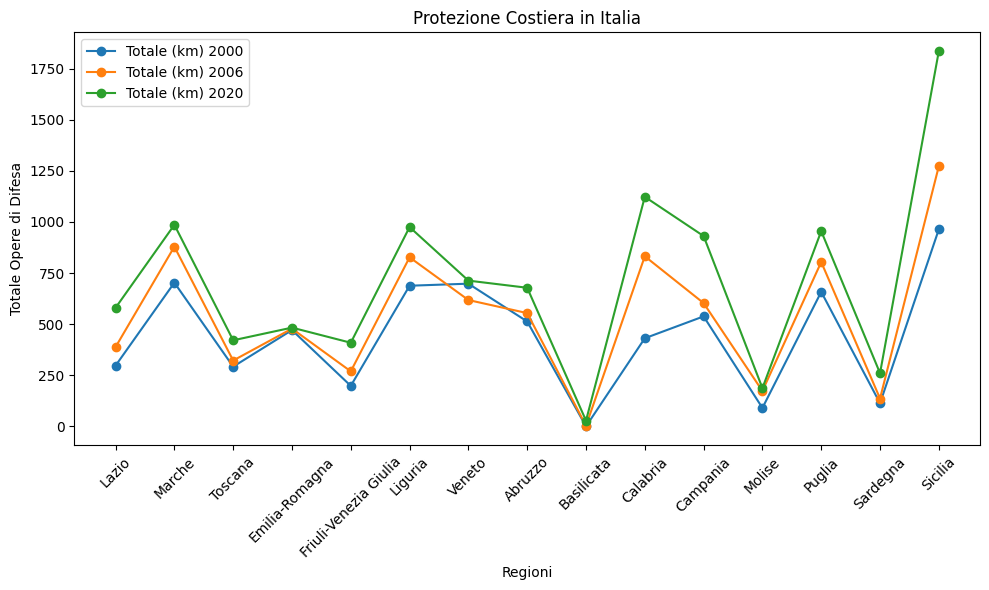

In [2]:
# %%

import pandas as pd
import matplotlib.pyplot as plt


columns_of_interest = ['Totali_2000', 'Totali_2006', 'Totali_2020']

# Creazione del pivot
df_pivot_cleaned = df2.loc[:, ['Regioni'] + columns_of_interest]
italia_row = df_pivot_cleaned[df_pivot_cleaned['Regioni'].str.contains('Totale', case=False, na=False)]
other_rows = df_pivot_cleaned[~df_pivot_cleaned['Regioni'].str.contains('Totale', case=False, na=False)]

# Ordina e combina i dataframe
other_rows = other_rows.sort_values(['Regioni'])
df2 = pd.concat([other_rows, italia_row]).reset_index(drop=True)

# Aumenta l'indice di 1 per chiarezza
df2.index = df2.index + 1

# Plot dei dati
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df2['Regioni'], df2['Totali_2000'], label='Totale (km) 2000', marker='o')
ax.plot(df2['Regioni'], df2['Totali_2006'], label='Totale (km) 2006', marker='o')
ax.plot(df2['Regioni'], df2['Totali_2020'], label='Totale (km) 2020', marker='o')

ax.set_xlabel('Regioni')
ax.set_ylabel('Totale Opere di Difesa')
ax.set_title('Protezione Costiera in Italia')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
# %%

#La regione con il numero massimo di interventi
import pandas as pd

# Calcola il totale degli interventi per ciascuna regione
df2['Totale_Interventi'] = df2[['Isolotti_2000', 'Isolotti_2006', 'Isolotti_2020',
                                'Opere Miste_2000', 'Opere Miste_2006', 'Opere Miste_2020',
                                'Pennelli_2000', 'Pennelli_2006', 'Pennelli_2020',
                                'Radenti_2000', 'Radenti_2006', 'Radenti_2020',
                                'Scogliere_2000', 'Scogliere_2006', 'Scogliere_2020']].sum(axis=1)

# Ordina le regioni per numero totale di interventi
df_sorted = df2.sort_values(by='Totale_Interventi', ascending=False)


print(df_sorted[['Regioni', 'Totale_Interventi']])

# Determina la regione con il numero massimo di interventi
regione_massimo_interventi = df_sorted.iloc[0]

print("\nLa regione con il numero massimo di interventi è:", regione_massimo_interventi['Regioni'])
print("Numero totale di interventi:", regione_massimo_interventi['Totale_Interventi'])

                  Regioni Totale_Interventi
13                Sicilia              4073
9                  Marche              2568
8                 Liguria              2490
11                 Puglia              2417
3                Calabria              2386
4                Campania              2072
15                 Veneto              2029
1                 Abruzzo              1745
5          Emilia-Romagna              1432
7                   Lazio              1265
14                Toscana              1035
6   Friuli-Venezia Giulia               876
12               Sardegna               509
10                 Molise               450
2              Basilicata                31

La regione con il numero massimo di interventi è: Sicilia
Numero totale di interventi: 4073


In [15]:
# %%

#La regione con il numero massimo di interventi nei 3 anni
import pandas as pd

# Calcola il totale degli interventi per ciascun anno
df2['Totale_2000'] = df2[['Isolotti_2000', 'Opere Miste_2000', 'Pennelli_2000', 'Radenti_2000', 'Scogliere_2000']].sum(axis=1)
df2['Totale_2006'] = df2[['Isolotti_2006', 'Opere Miste_2006', 'Pennelli_2006', 'Radenti_2006', 'Scogliere_2006']].sum(axis=1)
df2['Totale_2020'] = df2[['Isolotti_2020', 'Opere Miste_2020', 'Pennelli_2020', 'Radenti_2020', 'Scogliere_2020']].sum(axis=1)

# Determina la regione con il numero massimo di interventi per ciascun anno
regione_massimo_2000 = df2.loc[df2['Totale_2000'].idxmax()]
regione_massimo_2006 = df2.loc[df2['Totale_2006'].idxmax()]
regione_massimo_2020 = df2.loc[df2['Totale_2020'].idxmax()]

# Creazione della tabella
result = pd.DataFrame({
    'Anno': ['2000', '2006', '2020'],
    'Regione con max interventi': [regione_massimo_2000['Regioni'], regione_massimo_2006['Regioni'], regione_massimo_2020['Regioni']],
    'Numero totale di interventi': [regione_massimo_2000['Totale_2000'], regione_massimo_2006['Totale_2006'], regione_massimo_2020['Totale_2020']]
})

result

,Anno,Regione con max interventi,Numero totale di interventi
0,2000,Sicilia,964
1,2006,Sicilia,1273
2,2020,Sicilia,1836


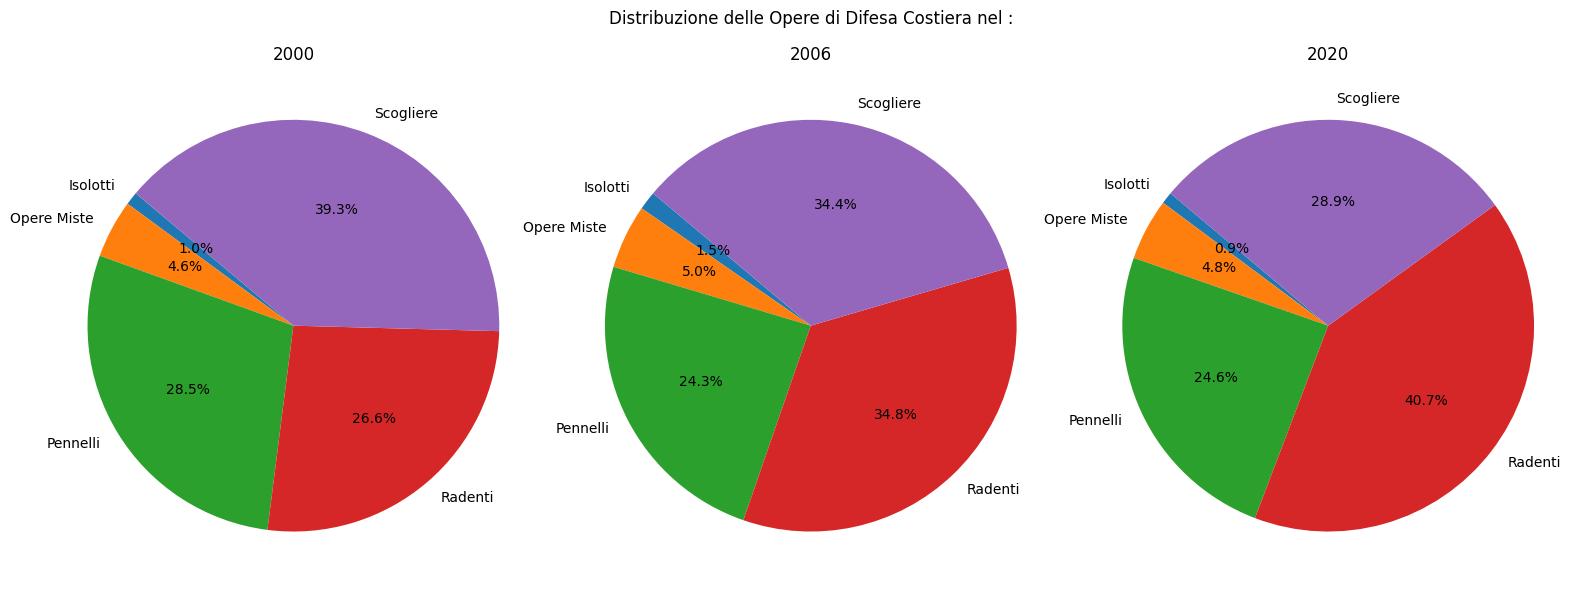

In [24]:
# %%
import pandas as pd
import matplotlib.pyplot as plt


result = pd.DataFrame({
    'Anno': ['2000', '2006', '2020'],
    'Regione con max interventi': [regione_massimo_2000['Regioni'], regione_massimo_2006['Regioni'], regione_massimo_2020['Regioni']],
    'Numero totale di interventi': [regione_massimo_2000['Totale_2000'], regione_massimo_2006['Totale_2006'], regione_massimo_2020['Totale_2020']]
})

result

totali_2000 = df2[['Isolotti_2000', 'Opere Miste_2000', 'Pennelli_2000', 'Radenti_2000', 'Scogliere_2000']].sum()
totali_2006 = df2[['Isolotti_2006', 'Opere Miste_2006', 'Pennelli_2006', 'Radenti_2006', 'Scogliere_2006']].sum()
totali_2020 = df2[['Isolotti_2020', 'Opere Miste_2020', 'Pennelli_2020', 'Radenti_2020', 'Scogliere_2020']].sum()


totali_2000.index =totali_2000.index.str.replace('_2000','')
totali_2006.index =totali_2000.index.str.replace('_2000','')
totali_2020.index =totali_2000.index.str.replace('_2000','')

# Creazione dei grafici a torta
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


# Grafico a torta per il 2000
axs[0].pie(totali_2000, labels=totali_2000.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('2000')

# Grafico a torta per il 2006
axs[1].pie(totali_2006, labels=totali_2006.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('2006')

# Grafico a torta per il 2020
axs[2].pie(totali_2020, labels=totali_2020.index, autopct='%1.1f%%', startangle=140)
axs[2].set_title('2020')

fig.suptitle("Distribuzione delle Opere di Difesa Costiera nel :")
fig.subplots_adjust(top=0.2)

plt.tight_layout()
plt.show()

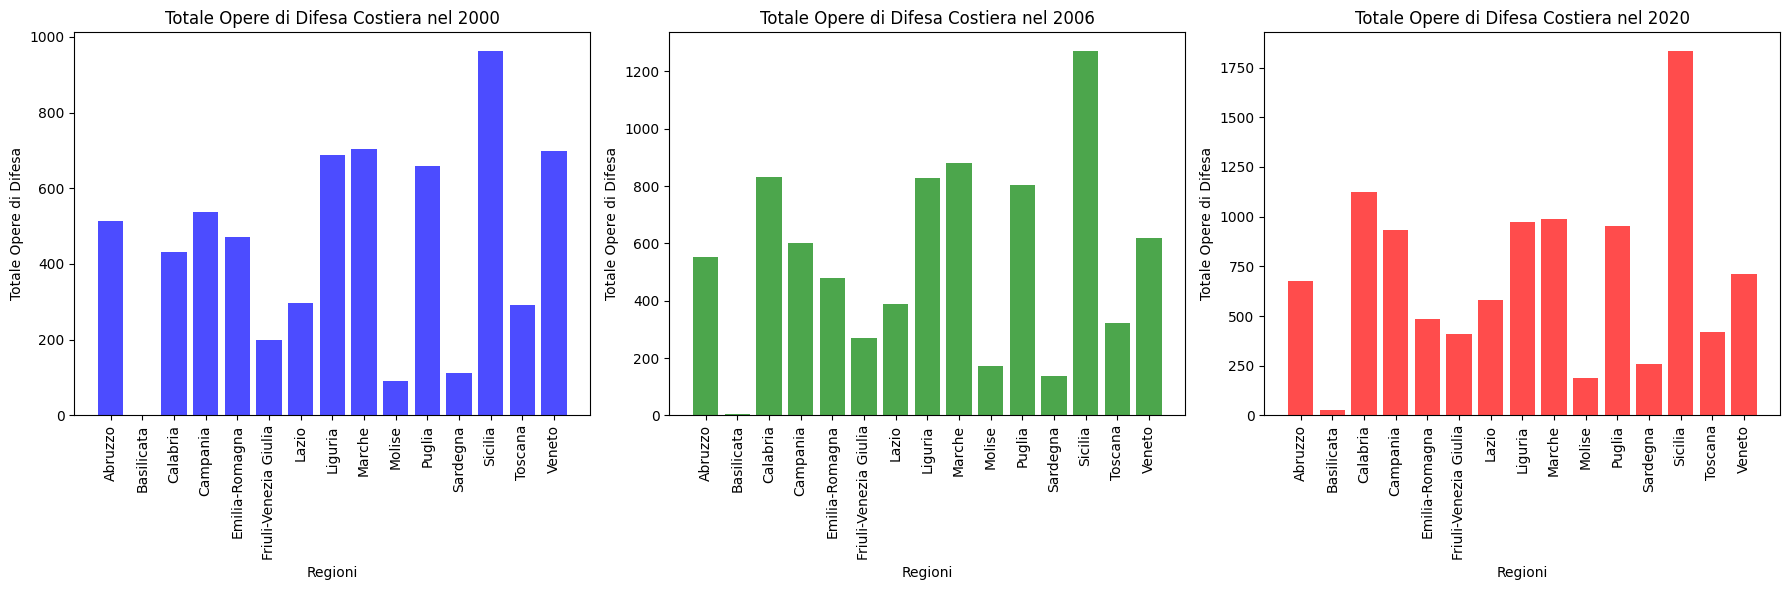

In [ ]:
# %%

import pandas as pd
import matplotlib.pyplot as plt


columns_of_interest = ['Totali_2000', 'Totali_2006', 'Totali_2020']



df_pivot_cleaned = df2.loc[:, ['Regioni'] + columns_of_interest]
italia_row = df_pivot_cleaned[df_pivot_cleaned['Regioni'].str.contains('Totale', case=False, na=False)]
other_rows = df_pivot_cleaned[~df_pivot_cleaned['Regioni'].str.contains('Totale', case=False, na=False)]


other_rows = other_rows.sort_values(['Regioni'])
df2 = pd.concat([other_rows, italia_row]).reset_index(drop=True)

df2.index = df2.index + 1

fig, axs = plt.subplots(1, 3, figsize=(18, 6))


axs[0].bar(df2['Regioni'], df2['Totali_2000'], color='b', alpha=0.7)
axs[0].set_xlabel('Regioni')
axs[0].set_ylabel('Totale Opere di Difesa')
axs[0].set_title('Totale Opere di Difesa Costiera nel 2000')
axs[0].tick_params(axis='x', rotation=90)


axs[1].bar(df2['Regioni'], df2['Totali_2006'], color='g', alpha=0.7)
axs[1].set_xlabel('Regioni')
axs[1].set_ylabel('Totale Opere di Difesa')
axs[1].set_title('Totale Opere di Difesa Costiera nel 2006')
axs[1].tick_params(axis='x', rotation=90)


axs[2].bar(df2['Regioni'], df2['Totali_2020'], color='r', alpha=0.7)
axs[2].set_xlabel('Regioni')
axs[2].set_ylabel('Totale Opere di Difesa')
axs[2].set_title('Totale Opere di Difesa Costiera nel 2020')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()